# **Quantum programming I**

$\newcommand{\bra}[1]{\langle#1|}$
$\newcommand{\ket}[1]{|#1\rangle}$

## **Introduction**

Loosely speaking, quantum programming consists of two components. First, there is an abstract model&mdash;the **circuit model**&mdash;which we use to represent quantum programs. Second, we will use an actual, concrete programming language, Python, to create, manipulate and run quantum circuits or programs.

We will briefly discuss quantum circuits and then dive into Python programming.

### **Quantum circuits**

At the heart of a quantum program is a **quantum circuit**. It is the same idea that is used in classical programming. A quantum circuit has 'wires' that carry **qubits** (quantum bits) instead of classical bits, and the qubits are acted on by **gates**. A generic quantum circuit looks like this:

<img src="img/general-quantum-circuit-1.png" alt="Quantum circuit" style="width: 300px;"/>

Gates are shown as rectangular blocks with $N$ wires entering and $N$ leaving the gate. We imagine the qubits, or actually their states, as propagating from left to right along the wires.

For instance, in the Figure, the initial state entering the circuit is a four qubit product state

$$
\ket{\psi_I} = \ket{0} \otimes \ket{0} \otimes \ket{0} \otimes \ket{0} \equiv
\ket{0000}.
$$

As the state propagates to the right, the qubits are processed by gates $U_1$,
$U_2$, $U_3$ and $U_4$. At the end we have a **possibly entangled** final state
$\ket{\psi_F}$. The final state is then measured **in the computational basis**,
this is represented by the block that reminds of a measurement device.

In summary, a quantum circuit looks very much like a classical circuit, except that we have replaced classical elements with quantum elements: 

- (classical) bits $\rightarrow$ qubits
- (classical) gates $\rightarrow$ quantum gates which are represented by unitary operators and measurements.

### **Quantum programming libraries**

With the circuit paradigm underlying quantum programming, our task is now to use a generic programming language to **create** and **run** circuits depicted above. To this aim, many libraries have been created. Among the best known to date are: 

* [`Qiskit` by IBM](https://qiskit.org/) (Python)

* [`Cirq` by Google](https://quantumai.google/cirq) (Python)

* [`Q#` by Microsoft](https://azure.microsoft.com/en-us/resources/development-kit/quantum-computing/)

There are others too. However, because `Qiskit`, which was one of the first, enjoys wide support among quantum hardware vendors and is used widely in education, we will focus on `Qiskit` in our practice session. Since many other libraries also rely on the circuit model, once one masters `Qiskit`, it is relatively easy to learn and use a different library.

## **Practice session 1: Single qubit**

### **First circuit: template of a quantum program**

The basic template of a quantum program contains two parts: 

1. create and design a circuit
2. run the circuit.

The following code shows this structure.

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

# create quantum circuit
qc = QuantumCircuit(1)

qc.x(0)                          # add a gate to the circuit
qc.measure_all()                 # add measurement at the end

# run
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = sim.run(qobj).result()  # run circuit, get results

# output statistics
counts = result.get_counts()     # extract statistics from results
print(counts)

{'1': 1024}


Let us walk through the code. 

In line 5 (L5) we create a quantum circuit `qc` that consists of 1 qubit, the argument of `QuantumCircuit()`. At this point, the circuit is an empty object, a container to which we can add gates. 

In L7 we add the Pauli $X$ gate `x(qubit)`, which flips the qubit state. The argument `0` is the number of the qubit to which the gate is applied.

When we are done with unitary gates, we add a measurement gate at the end of the circuit in L8. This performs a measurement in the computational basis, the basis $\{ \ket{0}, \ket{1} \}$. 

This concludes our simple circuit.

To run the circuit (L11-L13), we create a 'quantum machine' on which the circuit will be run. The library allows one to choose between different kinds of 'quantum machines'. It can be a fake 'quantum machine', that is, a simulator, which is basically a classical computer with a CPU or GPU that simulates a quantum computer. Or it can be a real quantum device that is implemented in a particular physical hardware. At this point, we have chosen the `aer_simulator` which is simulator that can be mimic many different kinds of quantum evolutions.

Finally, in L16 we extract measurement statistics from results.

What does the printout `{'1': 1024}` show? It shows that as a result of the measurement, we have gotten the state $\ket{1}$ 1024 times. By default, our simulator ran the circuit 1024 times, and each time we got the same state.

We can depict this in a histogram. The histogram shows probabilities instead of raw counts.

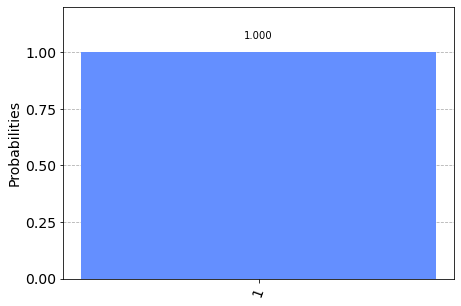

In [2]:
plot_histogram(counts)

We can also draw the quantum circuit. The argument `"mpl"` gives a nice matplotlib output.

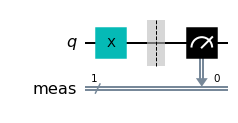

In [3]:
qc.draw("mpl")

The line or wire marked with `q` depicts our qubit. The dashed line is a barrier that visually separates different operations; it is more useful with larger circuits and measurements.

At the end there is the measurement.

Note that the circuit has an additional wire `meas` that we did not add. When we measure, we need to store the measurement result somewhere; for this purpose, the library has added a classical bit silently. We could have, and will add, classical bits explicitly in the future.

Note also that the result of the computation depends on the initial state. By default the initial state is set to $\ket{0}$. If we want, we can set the initial state to whatever we like. We can also draw the circuit with the initial state of the qubit(s) and the classical bit(s) shown explicitly, here $\ket{0}$ and $0$, respectively.

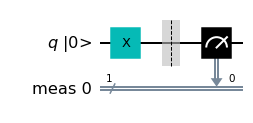

In [4]:
qc.draw(output="mpl", initial_state=True)

> **Exercise 1**. Display the circuit using a text backend by setting output to `"text"`.

### **Measurement**

Measurement is a central to quantum theory. When we want to learn what is the state of the quantum system we need to carry out a measurement. For quantum computing it means if we want to learn what is the result of the computation, we need to carry out a measurement on the qubits that comprise our quantum computer. Let us investigate measurement.

In the above histogram we learned that measurement of the qubit gave the state $\ket{1}$ for all runs of the circuit. This means the probability of getting $\ket{1}$ was 100%. In fact, this is exactly what we would get in classical setting: if the initial bit is $0$ and we perform a NOT operation, the output is $1$.

Let us next set the initial state $\ket{\psi_i}$ to a linear combination or superposition of basis qubits

$$
\ket{\psi_i} = \frac{\ket{0} + \ket{1}}{\sqrt{2}}.
$$

This corresponds to the vector $\left(1 / \sqrt{2}, 1 / \sqrt{2}\right)$. Let us see how the result changes.


Counts = {'0': 507, '1': 517}



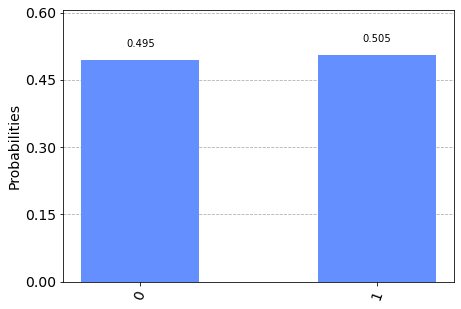

In [5]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
import numpy as np

# create quantum circuit
qc = QuantumCircuit(1)

init_state = [1. / np.sqrt(2), 1. / np.sqrt(2)]  # define initial state
qc.initialize(init_state, 0)                     # initialize qubit 0 to init_state

qc.x(0)                          # add a gate to the circuit
qc.measure_all()                 # add measurement at the end

# run
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = sim.run(qobj).result()  # run circuit, get results

# output statistics
counts = result.get_counts()     # extract statistics from results
print("\nCounts =", counts)
print()

plot_histogram(counts)

We observe that the states $\ket{0}$ (represented by `0`) and $\ket{1}$ (represented by `1`) were obtained in an almost equal number of cases. The histogram shows the respective probabilities, that is, the relative number of occurrence of each outcome, $p_i = \frac{N_i}{N}$ where $N_i$ is the number of outcomes $i$ and $N$ is the total number of outcomes.

We know from quantum theory that the square moduli of coefficients in the state vector show probabilities. The state vector in the code has $1/\sqrt{2}$ for each state and the $X$ gate flips both qubits, giving the same state. Hence the probability of getting each should be $0.5$, and not less and not more. But when you run the above circuit many times, you see that the distribution is always different and rarely precisely $(0.5, 0.5)$. What is happening?

The reason is that the simulator is trying to mimic a realistic quantum machine. An experimental distribution above generally differs from the ideal distribution $(0.5, 0.5)$. We would get closer to the ideal homogeneous distribution $(0.5, 0.5)$ when we increase the number shots. This is the same phenomenon as in any other random experiment like tossing a coin or rolling a die.

In the following exercises, use the code above.

> **Exercise 2**. Experiment with different number of shots in the above code and see how the distribution changes. Set the number of shots in the `run` call as follows: `simulator.run(qobj, shots=1024)`. Run the circuit with `shots=100`, `shots=1024` and `shots=4000`. Observe the distribution approaching $(0.5, 0.5)$ as the number of shots increases.

> **Exercise 3.** Experiment with a different initial state in the above code. Set the initial state to `[np.sqrt(1 / 4), np.sqrt(3 / 4)]`. How do the counts and the histogram change? Use a large number of shots to get better statistics.

> **Exercise 4.** Experiment with the initial state to `[np.sqrt(1 / 4), 1j*np.sqrt(3 / 4)]`. Is the probability distribution different from the one in the previous exercise?

### **Bloch sphere visualization**

The state $\ket{\psi}$ of a single qubit lives in $\mathbb{C}^2$. The two complex coordinates of this space correspond to four real numbers, that is, a four dimensional real space. We cannot visualize this geometrically. 

However, we can represent the quantum state using a 3D unit vector, the so called Bloch vector. This enables to visualize the quantum state using 3D geometry. It is a great tool for studying the behavior of qubits.

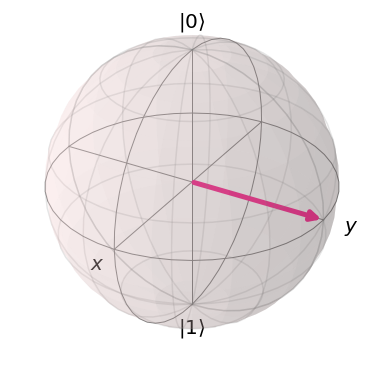

In [6]:
from qiskit.visualization import plot_bloch_vector

vector = [0, 1, 0]         # coordinates [x, y, z]
plot_bloch_vector(vector)  # plot in the Bloch sphere

It is important to keep in mind that the quantum state and the Bloch vector are two different objects. They belong to different spaces. The Bloch vector *represents* the quantum state.

Secondly, the Bloch sphere is first and foremost intended for single qubit states. Although we will sometimes use the Bloch sphere for multi-qubit states, its usage there will be limited.

### **Single qubit gates**

Single qubit gates are the building blocks of your quantum circuit. When we build quantum circuits, we only need a restricted set of gates&mdash;a universal set&mdash;to build any circuit we want. In more mathematical terms, we can express any unitary (=any circuit) with a series of gates that belong to a universal set.

#### **Pauli gates**

These are the gates represented by the Pauli matrices

$$
X = \begin{bmatrix} 
      0 & 1 \\ 1 & 0 
    \end{bmatrix},\quad\quad\quad\quad 
Y = \begin{bmatrix} 
      0 & -i \\ i & 0 
    \end{bmatrix},\quad\quad\quad\quad 
Z = \begin{bmatrix} 
      1 & 0 \\ 0 & -1 
    \end{bmatrix}.
$$


Using Qiskit, we represent them with the respective lower case letters. Let's build a simple circuit without a measurement.

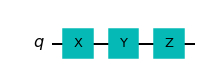

In [7]:
qc = QuantumCircuit(1)
qc.x(0)
qc.y(0)
qc.z(0)
qc.draw("mpl")

Let us illustrate the effect of the $X$ gate on the Bloch sphere. In the following example, we do not perform a measurement at the end of the circuit. We will use the simulator that enables to directly inspect the state after running the circuit.

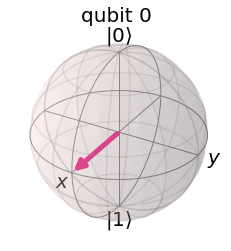

In [15]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# create quantum circuit
qc = QuantumCircuit(1)

#[1. / np.sqrt(2), 1. / np.sqrt(2)]
init_state = [1. / np.sqrt(2), 1. / np.sqrt(2)]  # define initial state
qc.initialize(init_state, 0)
qc.x(0)                                # add gate x(qubit)

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()                  # we want to use statevector later
qobj = assemble(qc)
result = sim.run(qobj).result()         # run circuit, get results
final_state = result.get_statevector()  # get the final state from the result

# visualize
plot_bloch_multivector(final_state)     # display final state directly on Bloch sphere

Note that

1. we did not specify the initial state, so the initial state was $\ket{0}$,

2. we displayed the quantum state (which lives in $\mathbb{C}^2$) directly on the Bloch sphere using the `plot_bloch_multivector()` routine. Using the latter, we did not need to convert the state into a 3D Bloch vector.

We can think of the $X$ gate as performing a rotation by $\pi$ radians around the $x$-axis on the Bloch sphere. It is often called a NOT-gate in analogy to the classical NOT gate. 

Similarly, we can think of the $Y$ and $Z$ gates as $\pi$ rotations around the $y$- and $z$-axes, respectively.

> **Exercise 5**. Visualize the action of the $Z$ gate on the initial state `[1. / np.sqrt(2), 1. / np.sqrt(2)]` using the Bloch sphere. Use the code above.

#### **Hadamard gate**

The Hadamard gate is an interesting gate since it transforms a basis state into a superposition,

$$
H|0\rangle = \frac{\ket{0} + \ket{1}}{\sqrt{2}}, \quad\quad\quad 
H|1\rangle = \frac{\ket{0} - \ket{1}}{\sqrt{2}}.
$$

It is represented by the following matrix,

$$
H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 
      1 & 1 \\ 1 & -1 
    \end{bmatrix}.
$$

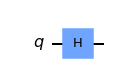

In [9]:
qc = QuantumCircuit(1)
qc.h(0)  # add Hadamard gate h(qubit)
qc.draw("mpl")

Let's visualize the action of the Hadamard gate on the basis state $\ket{0}$.

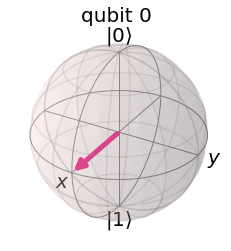

In [10]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# create quantum circuit
qc = QuantumCircuit(1)

qc.h(0)                                # add h(qubit)

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()                  # we want to use statevector later
qobj = assemble(qc)
result = sim.run(qobj).result()         # run circuit, get results
final_state = result.get_statevector()  # get the final state from the result

# visualize
plot_bloch_multivector(final_state)     # display final state directly on Bloch sphere

We can think of the Hadamard gate as a transformation between the $X$ and $Z$ bases. Alternatively, it can be viewed as a rotation around the axis in the direction of the Bloch vector $[1, 0, 1]$.

> **Exercise 6**. Change the above code as follows: perform the Hadamard gate $H$, then the $Z$ gate, followed by one more $H$.

#### **Rotations**

Above we mentioned rotations by $\pi$ radians. We can rotate the state by any angle $\phi$ around $x, y$ and $z$-axis using parameterized gates $R_x(\phi), R_y(\phi)$ and $R_z(\phi)$. The Python routines are, respectively, `rx(), ry()` and `rz()` with the arguments `theta, qubit` in each case.

In the following example we rotate $\ket{0}$ around the $x$-axis by $\pi / 2$.

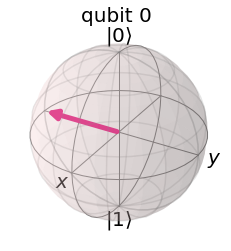

In [11]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# create quantum circuit
qc = QuantumCircuit(1)

qc.rx(np.pi / 2, 0)                    # add rx(angle, qubit)

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()                  # we want to use statevector later
qobj = assemble(qc)
result = sim.run(qobj).result()         # run circuit, get results
final_state = result.get_statevector()  # get the final state from the result

# visualize
plot_bloch_multivector(final_state)     # display final state directly on Bloch sphere

> **Exercise 7**. Add a rotation to the above code so that the final state is rotated halfway between the $x$ and $y$-axis.

#### **P** and **S**-gates

Rotation around the $z$-axis has the form 

$$
Z = \begin{bmatrix} 
      1 & 0 \\ 0 & e^{i\phi} 
    \end{bmatrix}.
$$

and is alternatively called the $P$-gate (=phase gate) since it adds a phase $e^{i\phi}$ to $\ket{1}$. In Python, we write `p(phase, qubit)`.

The $S$-gate is a $z$-rotation by $\pi / 2$ radians, so it's really the $P$-gate with $\phi = \pi / 2$. 

In the following example we use the $P$-gate to rotate the qubit in the positive direction of the $y$-axis.

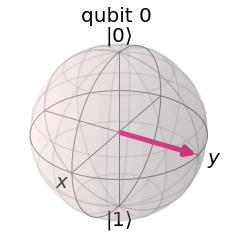

In [12]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# create quantum circuit
qc = QuantumCircuit(1)

qc.rx(np.pi / 2, 0)                    # add rx(angle, qubit)
qc.p(np.pi, 0)                         # add p(phase, qubit)

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()                  # we want to use statevector later
qobj = assemble(qc)
result = sim.run(qobj).result()         # run circuit, get results
final_state = result.get_statevector()  # get the final state from the result

# visualize
plot_bloch_multivector(final_state)     # display final state directly on Bloch sphere

> **Exercise 8**. Change the above code so the final state is along the $x$-axis.

## **Summary**

In this session, we have reviewed single qubit operations. They are important because of universality: given all possible one qubit operations and an entangling two qubit operation (see next session), we can build any circuit we want. We do not need $3, 4, 5, \ldots$ qubit gates at all.

It is also important to notice that any given quantum computer has a small number of gates available that the hardware uses. All other gates are reduced to those gates. For this reason, this small set is called the **physical gates**. For instance, the IBM quantum computer hardware uses the $X, SX, R_z$ and the $I$ gate. The latter is identity, a no operation gate.

In the next session we will focus on two qubit gates.